<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 4. Modeling</p>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import important cleaned data
df = pd.read_csv("data/telco_clean.csv") # replace this 
#df.sample(6).T

In [3]:
df['Churn'] = df['Churn'].apply(lambda x: x.strip().replace("Yes", "1").replace("No", "0"))
df['Churn'] = df['Churn'].astype('int') 

In [4]:
def results(y_train, y_test, prediction_train, prediction_test):
    print('-'*60)
    print('Training accuracy Score:', accuracy_score(y_train, prediction_train))
    print('Model accuracy Score:', accuracy_score(y_test, prediction_test))

    print('-'*60)
    #print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_test))
    print('Confusion Matrix:\n', pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'],margins = True))

    print('-'*60)
    print('Classification Matrix:')
    print(classification_report(y_test, prediction_test))

## Seperate x, y and make dummy vatriables 

In [5]:
df = pd.get_dummies(df)
display(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No_phone',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No_internet', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No_internet',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No_internet',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No_internet',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No_internet',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'Payment

In [6]:
# I manually droped the selected columns was to removes columns like "OnlineSecurity_No_internet" so the model results is more 
# interpretable 
df.drop(['gender_Male','Partner_Yes','Dependents_Yes','PhoneService_No','MultipleLines_No_phone',
        'InternetService_No','OnlineSecurity_No_internet','OnlineBackup_No_internet',
        'DeviceProtection_No_internet', 'TechSupport_No_internet', 'StreamingTV_No_internet',
        'StreamingMovies_No_internet', 'Contract_Two_year', 'PaperlessBilling_No', 
         'PaymentMethod_Mailed_check'], axis=1, inplace=True)
display(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month_to_month',
       'Contract_One_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer', 'PaymentMethod_Credit_card',
       'PaymentMethod_Electronic_check'],
      dtype='object')

In [7]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']


## Baseline model

__which evaluation metric is most essential for this project ?__
$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} = \frac{\text{TP}}{\text{TP+FP}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} = \frac{\text{TP}}{\text{TP+FN}}$$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} = \frac{\text{TP + TN}}{\text{TP+TN+FP+FN}}  $$

churned customers are mportant. We need the model to predict as many churned customers as possible. Thus, we cannot afford a high FP. Therefore, __recall__ is important here.

In [8]:
# make a test-train split
from sklearn.model_selection import train_test_split
split_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=63,stratify=y)

In [9]:
# What does the split data diemention look like 
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (5274, 30)(5274,)
Test dataset: (1758, 30)(1758,)


In [10]:
#scale features 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# fit the baseline model 
#create an instance and fit the model 
logreg_base = LogisticRegression() # all default parameters
logreg_base.fit(X_train, y_train)

#predictions
prediction_train = logreg_base.predict(X_train)
prediction_test = logreg_base.predict(X_test)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.8081152825180129
Model accuracy Score: 0.8048919226393629
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1152  139  1291
1           204  263   467
All        1356  402  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.56      0.61       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
'''
smote
refre to install docs 
https://imbalanced-learn.readthedocs.io/en/stable/install.html
'''
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts())

Using TensorFlow backend.


1    3872
0    3872
dtype: int64


In [13]:
# after SMOTE
logreg_1 = LogisticRegression()
logreg_1.fit(X_train_resampled, y_train_resampled)

#predictions
prediction_train = logreg_1.predict(X_train)
prediction_test = logreg_1.predict(X_test)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.7565415244596132
Model accuracy Score: 0.7519908987485779
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0           962  329  1291
1           107  360   467
All        1069  689  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1291
           1       0.52      0.77      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.75      0.76      1758



C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train AUC: 0.8491294350750404
Test AUC: 0.8430113269762496


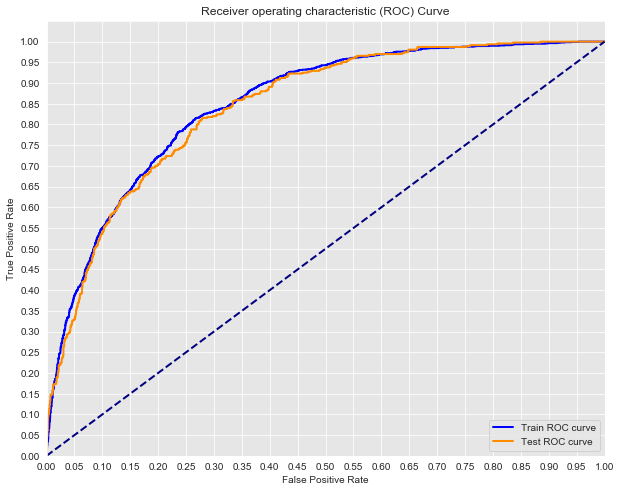

In [14]:
from sklearn.metrics import roc_curve, auc

y_score_test = logreg_1.decision_function(X_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)

y_score_train = logreg_1.decision_function(X_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

# Train AUC
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

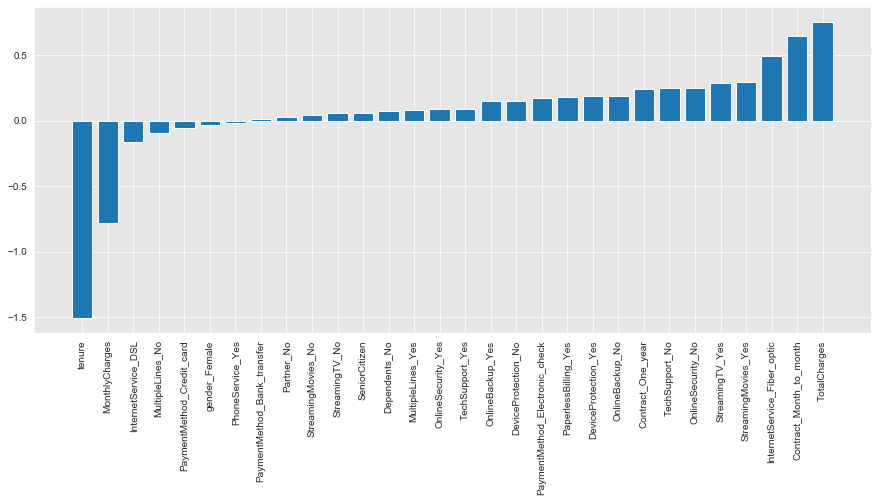

In [15]:
weights_LogReg = pd.Series(logreg_1.coef_[0], index=X.columns.values)
weights_LogReg.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(weights_LogReg.index,weights_LogReg.values)

In [16]:
'''
with tol=1e-6, max_iter=1000 increased precision added no benifit and increased calculation time. 
'''
from sklearn.metrics import precision_score
C = [1e10, 1000,100, 90, 10, 1, .1, .001]
for c in C:
    logmodel_tune = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    logmodel_tune.fit(X_train_resampled, y_train_resampled)
    print('C:', c)
    print('Training accuracy:', logmodel_tune.score(X_train_resampled, y_train_resampled))
    print('Test accuracy:', logmodel_tune.score(X_test, y_test))
    print('Precision score : ', precision_score(y_test, logmodel_tune.predict(X_test)))
    print('')

C: 10000000000.0
Training accuracy: 0.7754390495867769
Test accuracy: 0.7491467576791809
Precision score :  0.5187861271676301

C: 1000
Training accuracy: 0.7754390495867769
Test accuracy: 0.7491467576791809
Precision score :  0.5187861271676301

C: 100
Training accuracy: 0.7758264462809917
Test accuracy: 0.7497155858930603
Precision score :  0.5195369030390738

C: 90
Training accuracy: 0.7758264462809917
Test accuracy: 0.7497155858930603
Precision score :  0.5195369030390738

C: 10
Training accuracy: 0.7760847107438017
Test accuracy: 0.7497155858930603
Precision score :  0.5195369030390738

C: 1
Training accuracy: 0.7746642561983471
Test accuracy: 0.7536973833902162
Precision score :  0.5247093023255814

C: 0.1
Training accuracy: 0.7728564049586777
Test accuracy: 0.7536973833902162
Precision score :  0.5248538011695907

C: 0.001
Training accuracy: 0.7306301652892562
Test accuracy: 0.6581342434584755
Precision score :  0.42962184873949577



In [17]:
# after SMOTE
logreg_2 = LogisticRegression(penalty='l1', C=1, solver='liblinear')
logreg_2.fit(X_train_resampled, y_train_resampled)

#predictions
prediction_train = logreg_2.predict(X_train)
prediction_test = logreg_2.predict(X_test)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.7561623056503602
Model accuracy Score: 0.7536973833902162
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0           964  327  1291
1           106  361   467
All        1070  688  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1291
           1       0.52      0.77      0.63       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.75      0.77      1758



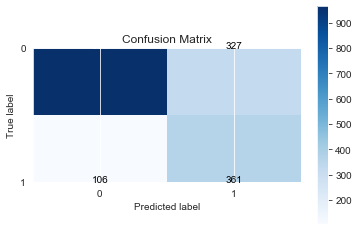

In [18]:
### Something wrong with the visualization 
import itertools

# Create the basic matrix
cnf_matrix=confusion_matrix(y_test, prediction_test)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)
#clf = clf.fit(X_train_resampled, y_train_resampled)


#Predict the response for test dataset
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.8043230944254836
Model accuracy Score: 0.782707622298066
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1104  187  1291
1           195  272   467
All        1299  459  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1291
           1       0.59      0.58      0.59       467

    accuracy                           0.78      1758
   macro avg       0.72      0.72      0.72      1758
weighted avg       0.78      0.78      0.78      1758



C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


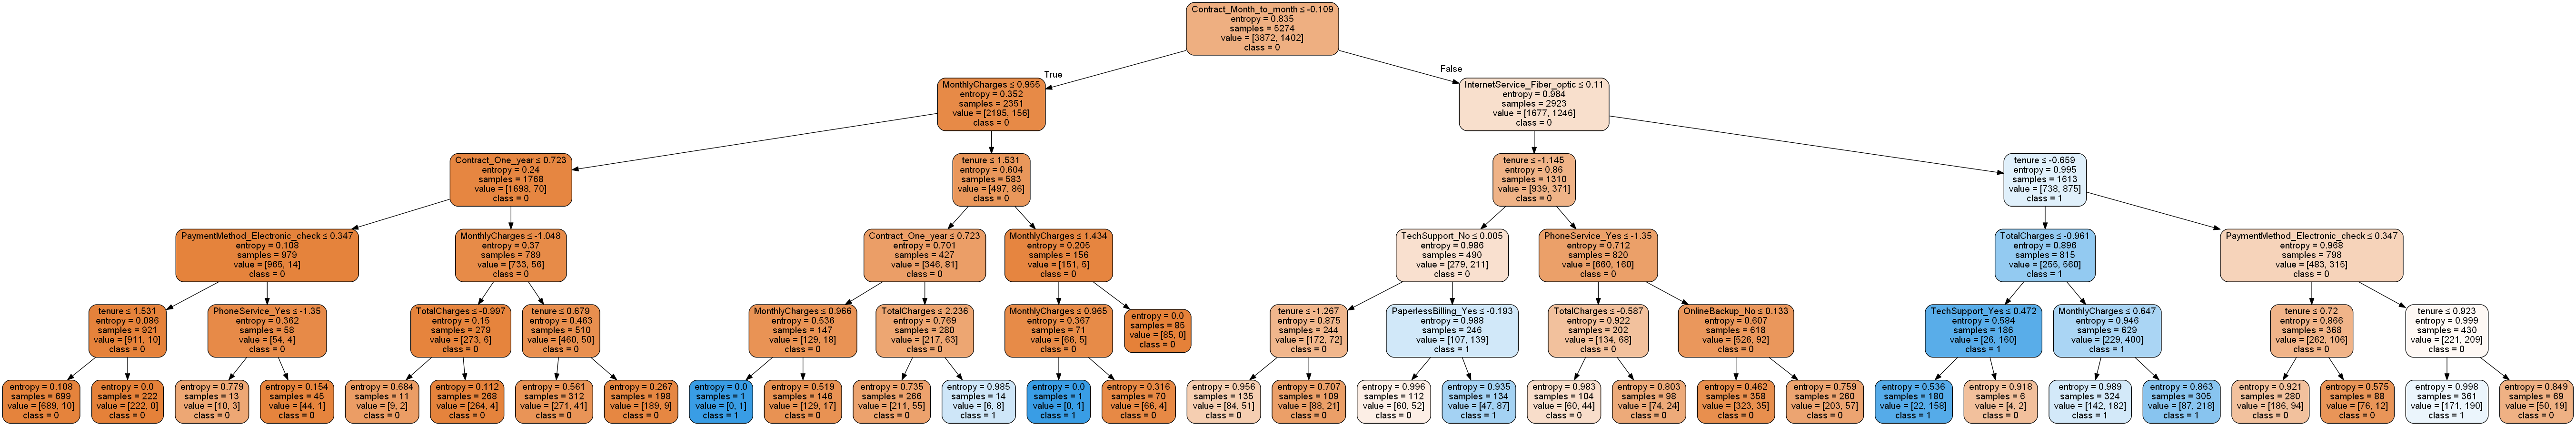

In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

col_names = list(X.columns)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('img/tree1.png')
Image(graph.create_png())

## SVM

In [28]:
from sklearn.svm import SVC

clf_svm_1 = SVC(kernel='linear')
clf_svm_1.fit(X_train_resampled, y_train_resampled)

#Predict the response for test dataset
prediction_test = clf_svm_1.predict(X_test)
prediction_train = clf_svm_1.predict(X_train)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.7009859689040576
Model accuracy Score: 0.6979522184300341
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1   All
Actual                   
0          843  448  1291
1           83  384   467
All        926  832  1758
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1291
           1       0.46      0.82      0.59       467

    accuracy                           0.70      1758
   macro avg       0.69      0.74      0.68      1758
weighted avg       0.79      0.70      0.72      1758

